In [1]:
%pip install pandas
%pip install openpyxl
%pip install matplotlib


You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('TRIMS_April.xlsx')
print(df.iloc[0, :10])

_id                                                        660b23b14391d129cc23c16b
revision                                                                         11
incident_id                                                             2024-4-1-14
incident_classification.category                                             safety
incident_classification.type                                                medical
incident_classification.subtype                                             medical
incident_date                                              2024-04-01T13:10:00.000Z
incident_title                       Medical Activation for Pax Onboard Scoot TR819
affected_flights.arr[0].flight_id                                  TR819-01-04-2024
affected_flights.arr[1].flight_id                                               NaN
Name: 0, dtype: object


In [3]:
total_rows = df.shape[0]
total_cols = df.shape[1]
print("Total number of rows:", total_rows)
print("Total number of cols:", total_cols)

Total number of rows: 124
Total number of cols: 730


Number of different incident categories: 5

Number of items in each category:
incident_classification.category
flight            53
safety            31
infrastructure    17
security          12
baggage           11
Name: count, dtype: int64


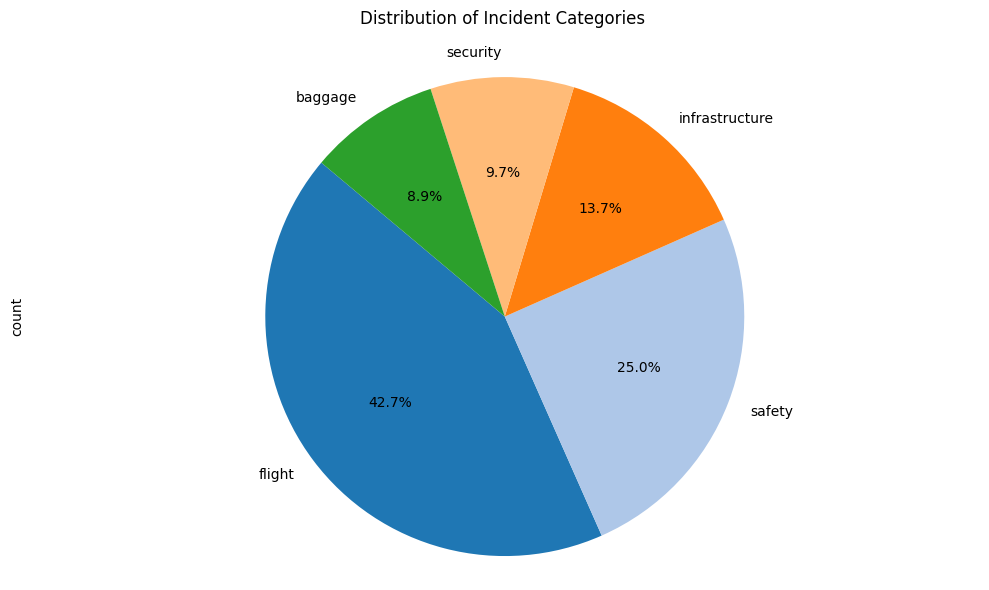

In [4]:
category_counts = df['incident_classification.category'].value_counts()
print("Number of different incident categories:", len(category_counts))

print("\nNumber of items in each category:")
print(category_counts)

plt.figure(figsize=(10, 6))
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Distribution of Incident Categories \n')
plt.axis('equal')
plt.tight_layout()
plt.show()


Number of different incident types: 9

Number of items in each type:
incident_classification.type
flight                          53
medical                         18
systems                         12
aviation                        12
late_baggage_presentation_sr    11
terminal                         8
terminal_facilities              5
fire                             3
landside_roadway                 2
Name: count, dtype: int64


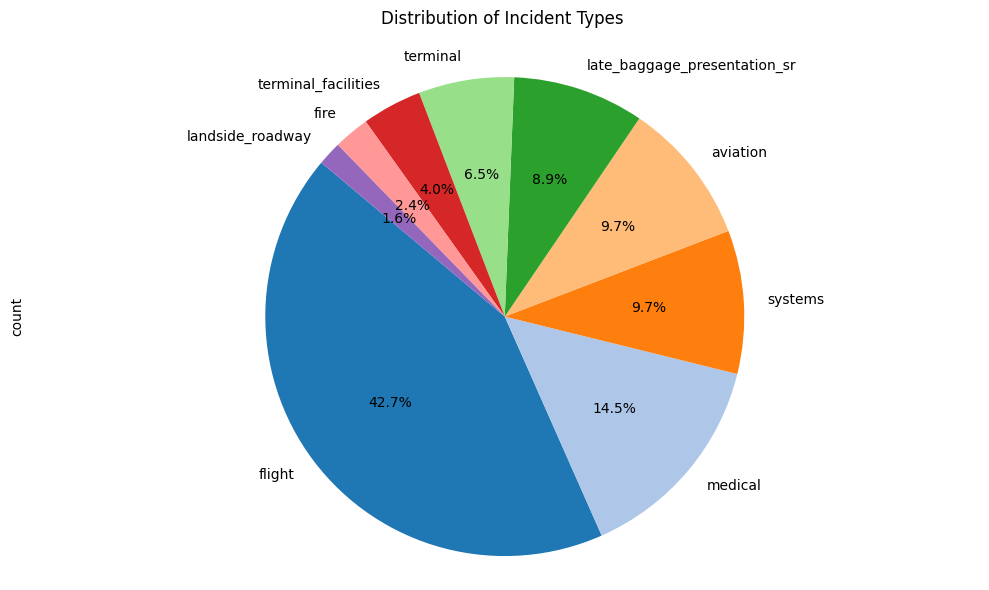

In [5]:
type_counts = df['incident_classification.type'].value_counts()
print("Number of different incident types:", len(type_counts))

print("\nNumber of items in each type:")
print(type_counts)

plt.figure(figsize=(10, 6))
type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Distribution of Incident Types \n')
plt.axis('equal')
plt.tight_layout()
plt.show()

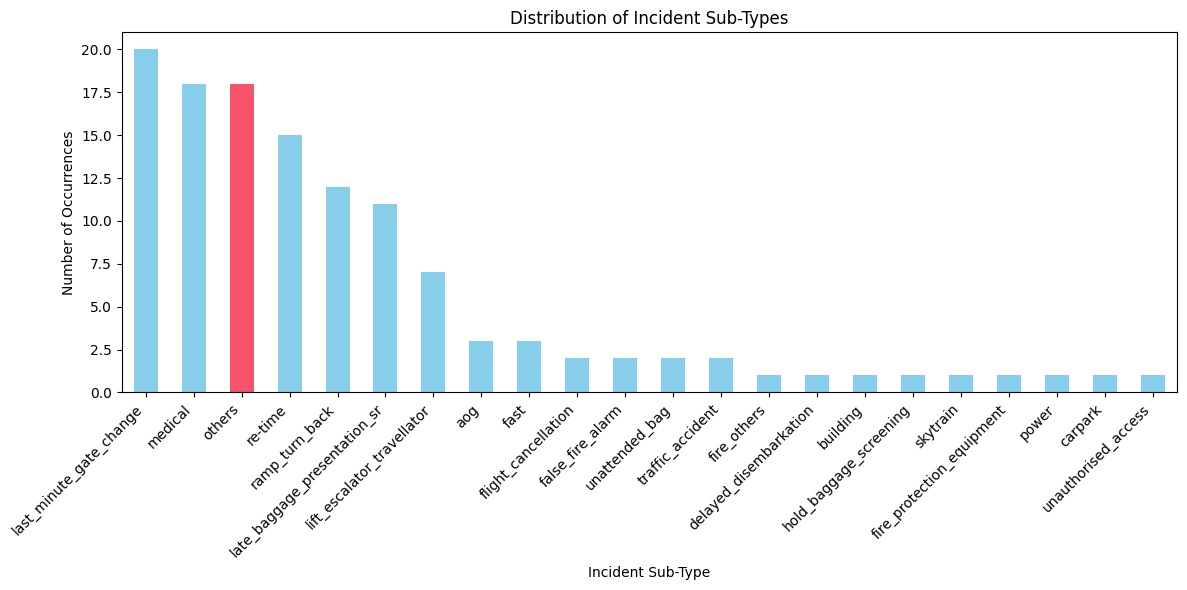

In [6]:
subtype_counts = df['incident_classification.subtype'].value_counts()

# Plot the bar chart
plt.figure(figsize=(12, 6))
subtype_counts.plot(kind='bar', color='skyblue')  # Set default color for all bars

# Highlight the "others" category in red
# Highlight all bars corresponding to the "others" category in red
for i, subtype in enumerate(subtype_counts.index):
    if subtype == 'others':
        plt.bar(i, subtype_counts.loc[subtype], color='#f6546a', width=0.5)


# Add labels and title
plt.xlabel('Incident Sub-Type')
plt.ylabel('Number of Occurrences')
plt.title('Distribution of Incident Sub-Types')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Ops Impact for Category 'flight':
31
Number of impacts being reported: 12
Number of no impacts: 19


/var/folders/pb/c1yrsckn6dnghx51jk5gj12r0000gn/T/ipykernel_83774/1719846673.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ops_impact_flight.fillna('Nil', inplace=True)


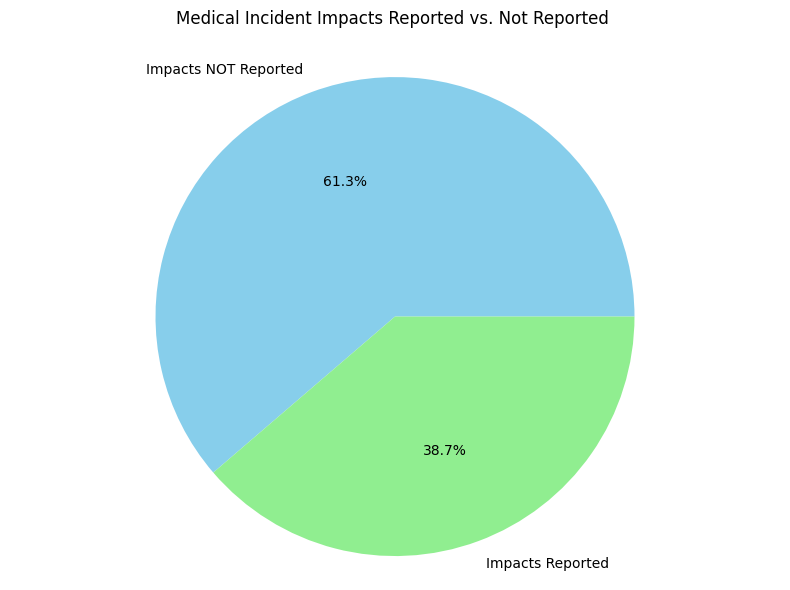

In [7]:
# Filter the DataFrame for incidents categorized as "flight"
flight_category_df = df[df['incident_classification.category'] == 'safety']

# Analyze the distribution of 'ops_impact' within the "flight" category
ops_impact_flight = flight_category_df['ops_impact']

print("Ops Impact for Category 'flight':")
print(len(ops_impact_flight))

ops_impact_flight.fillna('Nil', inplace=True)
nil_counts = ops_impact_flight.isin(['Nil', 'NIL', 'NIL.', 'Nil.']).sum()
not_nil_counts = len(ops_impact_flight) - nil_counts

print("Number of impacts being reported:", not_nil_counts)
print("Number of no impacts:", nil_counts)

pie_data = pd.Series([nil_counts, not_nil_counts], index=['Impacts NOT Reported', 'Impacts Reported'])

plt.figure(figsize=(8, 6))
pie_data.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Medical Incident Impacts Reported vs. Not Reported \n')
plt.axis('equal')
plt.tight_layout()
plt.show()

Ops Impact for Category 'flight':
53
Number of impacts being reported: 32
Number of no impacts: 21


/var/folders/pb/c1yrsckn6dnghx51jk5gj12r0000gn/T/ipykernel_83774/2961818444.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ops_impact_flight.fillna('Nil', inplace=True)


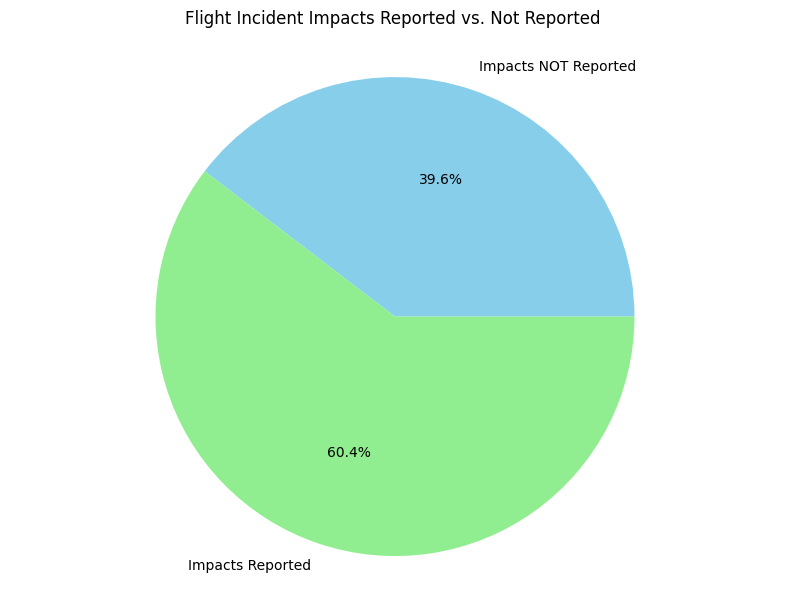

In [8]:
# Filter the DataFrame for incidents categorized as "flight"
flight_category_df = df[df['incident_classification.category'] == 'flight']

# Analyze the distribution of 'ops_impact' within the "flight" category
ops_impact_flight = flight_category_df['ops_impact']

print("Ops Impact for Category 'flight':")
print(len(ops_impact_flight))

ops_impact_flight.fillna('Nil', inplace=True)
nil_counts = ops_impact_flight.isin(['Nil', 'NIL', 'NIL.', 'Nil.']).sum()
not_nil_counts = len(ops_impact_flight) - nil_counts

print("Number of impacts being reported:", not_nil_counts)
print("Number of no impacts:", nil_counts)

pie_data = pd.Series([nil_counts, not_nil_counts], index=['Impacts NOT Reported', 'Impacts Reported'])

plt.figure(figsize=(8, 6))
pie_data.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Flight Incident Impacts Reported vs. Not Reported \n')
plt.axis('equal')
plt.tight_layout()
plt.show()


Number of impacts being reported: 72
Number of no impacts: 52


/var/folders/pb/c1yrsckn6dnghx51jk5gj12r0000gn/T/ipykernel_83774/1376258392.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ops_impact'].fillna('Nil', inplace=True)


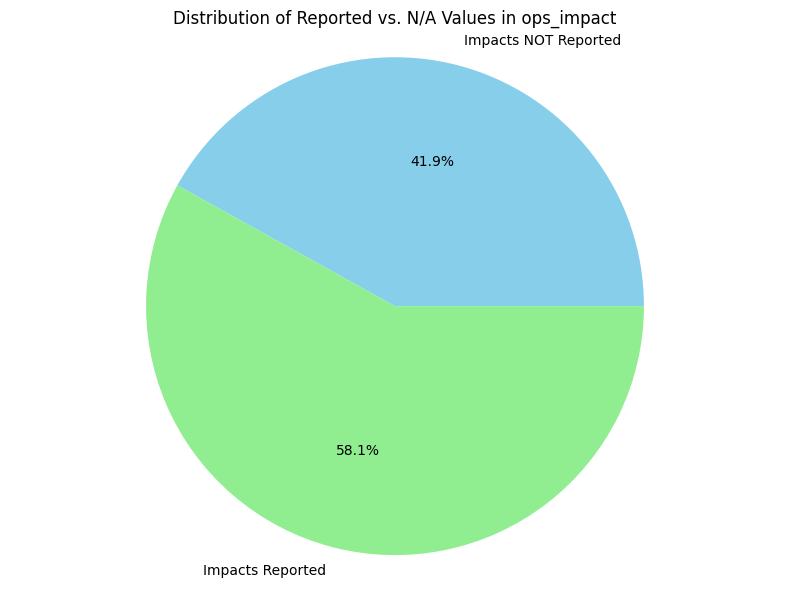

In [9]:
df['ops_impact'].fillna('Nil', inplace=True)
nil_counts = df['ops_impact'].isin(['Nil', 'NIL', 'NIL.', 'Nil.']).sum()
not_nil_counts = total_rows - nil_counts

print("Number of impacts being reported:", not_nil_counts)
print("Number of no impacts:", nil_counts)

pie_data = pd.Series([nil_counts, not_nil_counts], index=['Impacts NOT Reported', 'Impacts Reported'])

plt.figure(figsize=(8, 6))
pie_data.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Distribution of Reported vs. N/A Values in ops_impact')
plt.axis('equal')
plt.tight_layout()
plt.show()

Number of preliminary findings being reported: 8
Number of no preliminary_findings: 116


/var/folders/pb/c1yrsckn6dnghx51jk5gj12r0000gn/T/ipykernel_83774/559655406.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['preliminary_findings'].fillna('Nil', inplace=True)


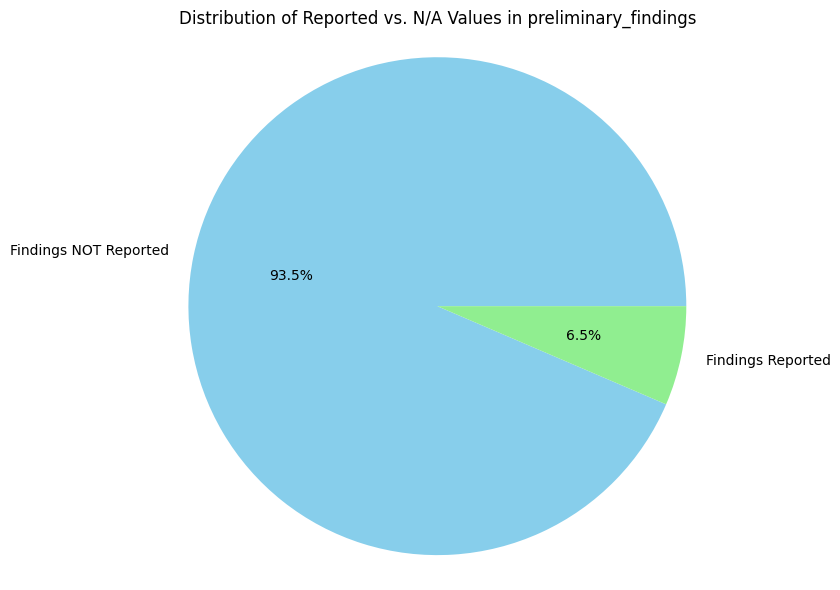

In [10]:
df['preliminary_findings'].fillna('Nil', inplace=True)
nil_counts = df['preliminary_findings'].isin(['Nil', 'NIL', 'NIL.', 'Nil.']).sum()
not_nil_counts = total_rows - nil_counts

print("Number of preliminary findings being reported:", not_nil_counts)
print("Number of no preliminary_findings:", nil_counts)

pie_data = pd.Series([nil_counts, not_nil_counts], index=['Findings NOT Reported', 'Findings Reported'])

plt.figure(figsize=(8, 6))
pie_data.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Distribution of Reported vs. N/A Values in preliminary_findings')
plt.axis('equal')
plt.tight_layout()
plt.show()

Number of followup actions being reported: 0
Number of no followup actions: 124


/var/folders/pb/c1yrsckn6dnghx51jk5gj12r0000gn/T/ipykernel_83774/1507391619.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['followup_actions'].fillna('Nil', inplace=True)


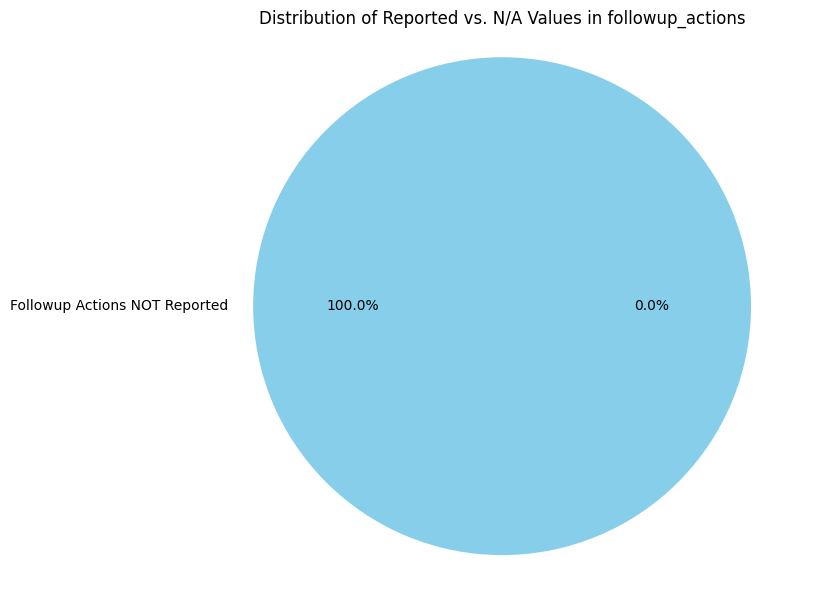

In [11]:
df['followup_actions'].fillna('Nil', inplace=True)
nil_counts = df['followup_actions'].isin(['Nil', 'NIL', 'NIL.', 'Nil.']).sum()
not_nil_counts = total_rows - nil_counts

print("Number of followup actions being reported:", not_nil_counts)
print("Number of no followup actions:", nil_counts)

pie_data = pd.Series([nil_counts, not_nil_counts], index=['Followup Actions NOT Reported', 'Followup Actions Reported'])

plt.figure(figsize=(8, 6))
pie_data.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Distribution of Reported vs. N/A Values in followup_actions')
plt.axis('equal')
plt.tight_layout()
plt.show()

Number of cag service recovery provided: 10
Number of cag service recovery NOT provided: 84
Number of not reported: 30


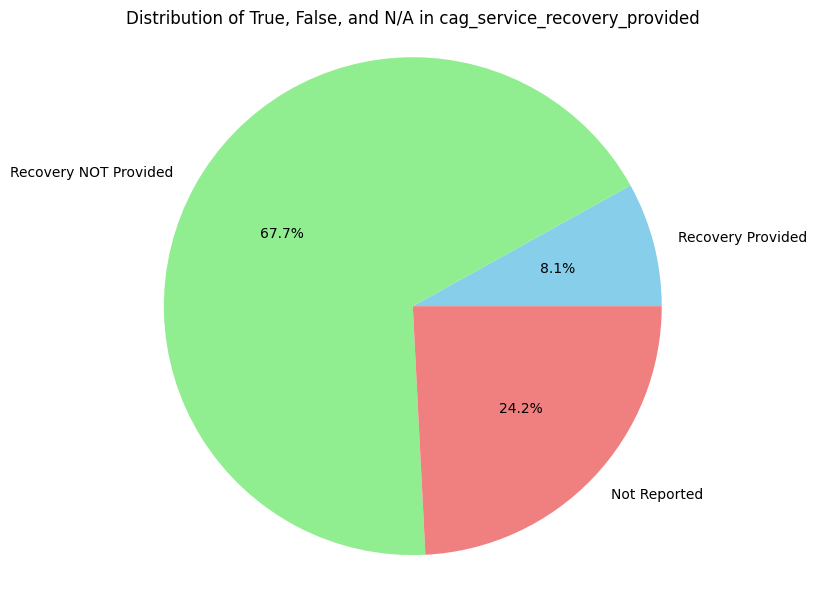

In [12]:
true_count = (df['cag_service_recovery_provided'] == True).sum()
false_count = (df['cag_service_recovery_provided'] == False).sum()
blank_count = df['cag_service_recovery_provided'].isna().sum()

print("Number of cag service recovery provided:", true_count)
print("Number of cag service recovery NOT provided:", false_count)
print("Number of not reported:", blank_count)

pie_data = pd.Series([true_count, false_count, blank_count], index=['Recovery Provided', 'Recovery NOT Provided', 'Not Reported'])

plt.figure(figsize=(8, 6))
pie_data.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of True, False, and N/A in cag_service_recovery_provided')
plt.axis('equal') 
plt.tight_layout()
plt.show()

Number of congestion observed: 1
Number of congestion NOT observed: 93
Number of not reported: 30


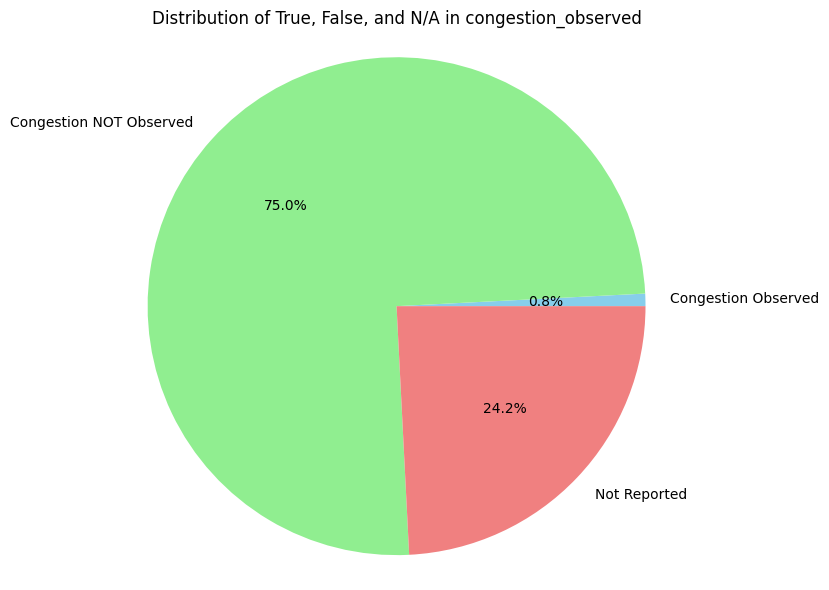

In [13]:
true_count = (df['congestion_observed'] == True).sum()
false_count = (df['congestion_observed'] == False).sum()
blank_count = df['congestion_observed'].isna().sum()

print("Number of congestion observed:", true_count)
print("Number of congestion NOT observed:", false_count)
print("Number of not reported:", blank_count)

pie_data = pd.Series([true_count, false_count, blank_count], index=['Congestion Observed', 'Congestion NOT Observed', 'Not Reported'])

plt.figure(figsize=(8, 6))
pie_data.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of True, False, and N/A in congestion_observed')
plt.axis('equal') 
plt.tight_layout()
plt.show()

In [14]:
%pip install extract-msg

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [15]:
%pip install imapclient

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [16]:
import extract_msg

f = r'Samples/TERMINAL MANAGEMENT CENTRE SITUATION REPORT - 01 February 2024 _Afternoon_.msg'  # Replace with yours
msg = extract_msg.Message(f)
msg_sender = msg.sender
msg_date = msg.date
msg_subj = msg.subject
msg_message = msg.body
msg.close()

print('Sender: {}'.format(msg_sender))
print('Sent On: {}'.format(msg_date))
print('Subject: {}'.format(msg_subj))
print('Body: {}'.format(msg_message))

Sender: Changi TMC <changi.tmc@changiairport.com>
Sent On: 2024-02-02 00:13:02+08:00
Subject: TERMINAL MANAGEMENT CENTRE SITUATION REPORT - 01 February 2024 [Afternoon]
Body: 

---

Terminal Management Centre Situation Report
Reporting Period	 1 February 2024 (1430H To 2200H)	
Reporting Shift	 Afternoon	
Reporting Day	 Thursday	
 	
Team	 AOC	 TMC	 Ground Deployment	 PA	 
A	 Alex	 James	 Benjamin (T1)	 Diana (T2)	 Diana (T3)	 Donovan (T4)	 -	 Raihanah (CAR1)	 Raihanah (CAR2)	 Raihanah (CAR3)	 Raihanah (CAR4)	 
 	
Executive Summary	 
Afternoon Shift (1430H - 2200H) 
Operational Highlights 

Ramp turn back was initiated for AirAsia departure flight AK716 (STD: 1845H) to Kuala Lumpur, back to Bay G11 due to aircraft technical issue (ELAC2 pitch fault). Pax were subsequently disembarked from aircraft back to departure transit while the aircraft engineers conducting rectification works. Flight was subsequently retimed to ETD: 0045H and was expected to incur delay of 6 hrs past STD. Incident 